# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

sns.set_theme()

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [4]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

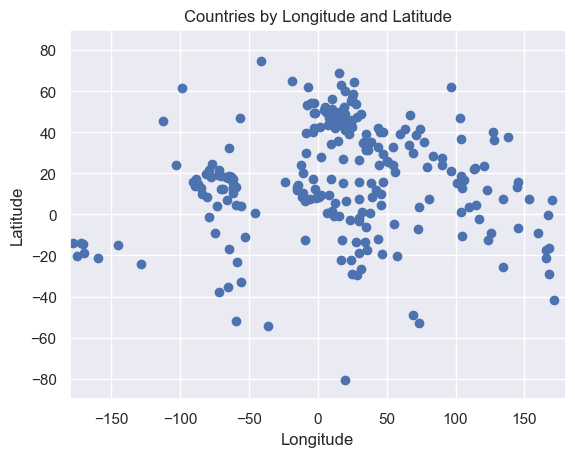

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.title('Countries by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [6]:
x = data.iloc[:, 1:3]
data_copy = data.drop(columns=['name'])
# data_copy.describe()
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [7]:
# kmeans = KMeans(2)
# kmeans = KMeans(3)
# kmeans = KMeans(7)
kmeans = KMeans(8)

In [8]:
kmeans.fit(x)

KMeans()

### Clustering Resutls

In [9]:
identified_clusters = kmeans.fit_predict(x)
x['Cluster'] = identified_clusters
x

,Longitude,Latitude,Cluster
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,6
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,6
239,27.774759,-13.458242,6


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

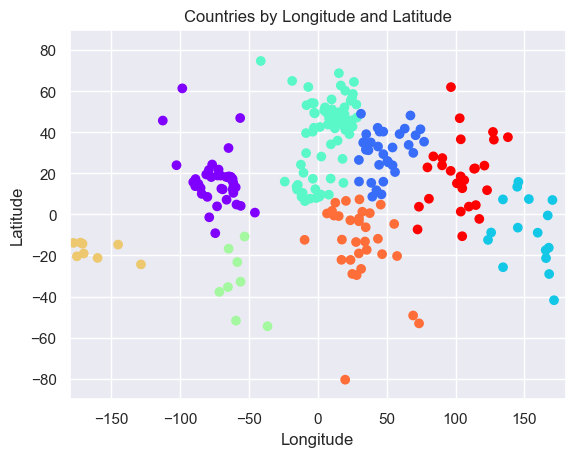

In [10]:
plt.scatter(x['Longitude'], x['Latitude'], c=x['Cluster'], cmap='rainbow')
plt.title('Countries by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

## Selecting the number of clusters

### WCSS

Use the intergrated sklearn method inertia_ to calculate the WCSS.

In [11]:
kmeans.inertia_

109754.53747506285

Use for loops to calculate the WCSS for 1 to 10  or more clusters.

In [12]:
wcsm = []
for i in range(1, 15):
    kmeans = KMeans(i)
    kmeans.fit(x)
    inertia = kmeans.inertia_
    wcsm.append(inertia)

In [13]:
wcsm

[1415171.2648966683,
 658058.1630168771,
 326180.45547331765,
 260156.42940548706,
 195662.7681452311,
 154695.86770164254,
 127682.42522267532,
 113546.63277109068,
 85069.5727196843,
 79413.2692483927,
 72060.44278654108,
 65708.36544131543,
 62718.41665228462,
 57275.06358546509]

## The Elbow Method

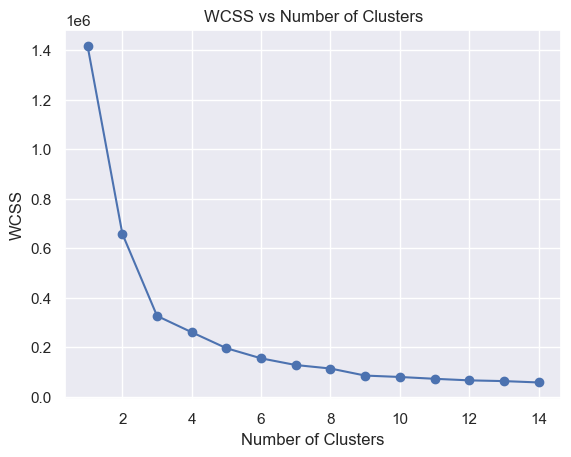

In [14]:
number_of_clusters = range(1, 15)
plt.plot(number_of_clusters, wcsm, marker='o')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
identified_clusters = kmeans.fit_predict(x)
x['Cluster'] = identified_clusters
x

,Longitude,Latitude,Cluster
0,-69.982677,12.520880,1
1,66.004734,33.835231,0
2,17.537368,-12.293361,0
3,-63.064989,18.223959,1
4,20.049834,41.142450,0
...,...,...,...
236,-172.164851,-13.753243,1
237,47.586762,15.909280,0
238,25.083901,-29.000341,0
239,27.774759,-13.458242,0


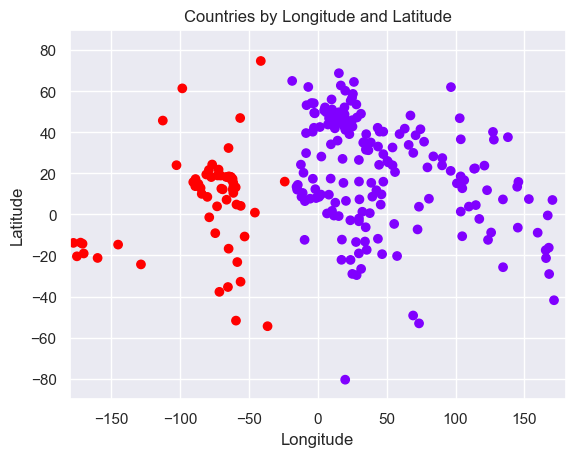

In [18]:
plt.scatter(x['Longitude'], x['Latitude'], c=x['Cluster'], cmap='rainbow')
plt.title('Countries by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()